In [1]:
import pandas as pd #pandas用于数据处理
import numpy as np  #numpy用于数值计算

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 导入数据并查看数据
da = pd.read_csv(r'C:\Users\admin\Desktop\mushrooms.csv')
da.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
da.info()  #查看 pandas DataFrame da 的信息摘要

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## 数据预处理

In [4]:
# 查看缺失值及重复值情况
da.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
print('重复数据量',len(da[da.duplicated()]))

重复数据量 0


In [6]:
da['class'].value_counts()    #标签分类总共e、p两种

e    4208
p    3916
Name: class, dtype: int64

In [7]:
# 特征和标签分开
category_da = da.columns.to_list()[1:]

In [8]:
# 标签
target = da.columns.to_list()[0]

In [9]:
# 使用sklearn包进行特征编码
from sklearn import preprocessing

# 初始化编码器
le = preprocessing.LabelEncoder()
for col in da.columns:
    da[col] = le.fit_transform(da[col])
da.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


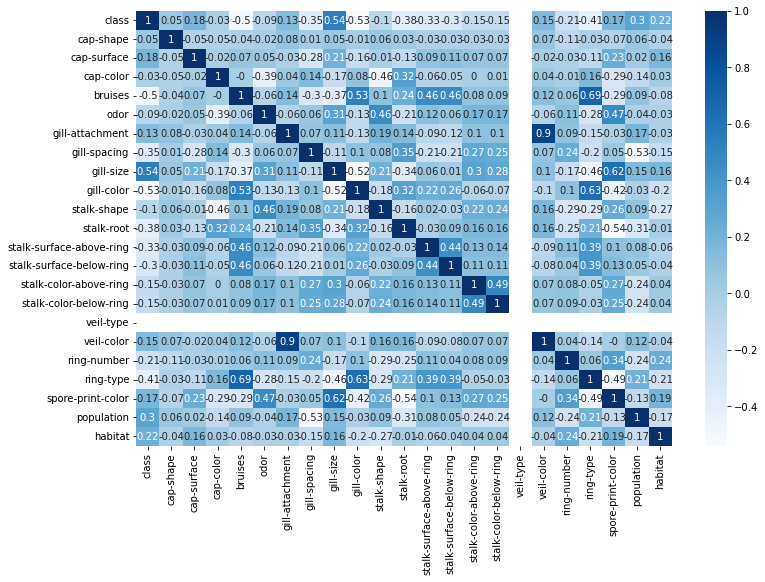

In [10]:
# 设置热力图大小
plt.figure(figsize=(12,8))
# 绘制热力图
sns.heatmap(round(da.corr(),2), cmap='Blues', annot=True)
plt.show()

#可以看到与gill-size（菌褶大小）和标签class相关系数最高0.54--正相关，
#gill-color（菌褶颜色）、bruises（伤痕）和标签相关系数-0.53、-0.5----负相关
#cap-color（菌盖颜色）和标签相关性最低仅为-0.03

In [11]:
# 查看各特征与标签的相关系数
da.corr()['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

In [12]:
da['veil-type'].value_counts() 

0    8124
Name: veil-type, dtype: int64

## 导入模型进行模型训练和预测

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
name_clf_list = [] 
train_model_score = [] # 训练集得分
test_model_score = [] # 测试集得分


In [15]:
# 划分数据集
x_train,x_test,y_train,y_test = train_test_split(da[category_da],da[target],test_size=0.2,random_state=2023)

## 逻辑回归

In [16]:
from sklearn.linear_model import LogisticRegression

# 实例化逻辑回归，并训练
logist_clf = LogisticRegression(random_state=0,solver='lbfgs')
logist_clf = logist_clf.fit(x_train, y_train)

## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict_log = logist_clf.predict(x_train)
test_predict_log = logist_clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('训练集预测情况:',metrics.accuracy_score(y_train,train_predict_log))
print('测试集预测情况:',metrics.accuracy_score(y_test,test_predict_log))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result_train = metrics.confusion_matrix(train_predict_log,y_train)
print('训练集集混淆矩阵:\n',confusion_matrix_result_train)
confusion_matrix_result_test = metrics.confusion_matrix(test_predict_log,y_test)
print('测试集混淆矩阵:\n',confusion_matrix_result_test)

name_clf_list.append('逻辑回归')
train_model_score.append(metrics.accuracy_score(y_train,train_predict_log))
test_model_score.append(metrics.accuracy_score(y_test,test_predict_log))

训练集预测情况: 0.9495306970303123
测试集预测情况: 0.9532307692307692
训练集集混淆矩阵:
 [[3221  182]
 [ 146 2950]]
测试集混淆矩阵:
 [[810  45]
 [ 31 739]]


## 朴素贝叶斯

In [17]:
from sklearn.naive_bayes import GaussianNB 

# 实例化朴素贝叶斯，并训练
NB_clf = GaussianNB(var_smoothing=1e-8)
NB_clf = NB_clf.fit(x_train, y_train)

## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict_NB = NB_clf.predict(x_train)
test_predict_NB = NB_clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('训练集预测情况:',metrics.accuracy_score(y_train,train_predict_NB))
print('测试集预测情况:',metrics.accuracy_score(y_test,test_predict_NB))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result_train = metrics.confusion_matrix(train_predict_NB,y_train)
print('训练集集混淆矩阵:\n',confusion_matrix_result_train)
confusion_matrix_result_test = metrics.confusion_matrix(test_predict_NB,y_test)
print('测试集混淆矩阵:\n',confusion_matrix_result_test)

name_clf_list.append('朴素贝叶斯')
train_model_score.append(metrics.accuracy_score(y_train,train_predict_NB))
test_model_score.append(metrics.accuracy_score(y_test,test_predict_NB))

训练集预测情况: 0.9158332051084782
测试集预测情况: 0.9261538461538461
训练集集混淆矩阵:
 [[3065  245]
 [ 302 2887]]
测试集混淆矩阵:
 [[778  57]
 [ 63 727]]


## K近邻

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# 实例化K近邻分类器，并训练
KN_clf = KNeighborsClassifier(3) # K设为3
KN_clf = KN_clf.fit(x_train, y_train)

## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict_KN = KN_clf.predict(x_train)
test_predict_KN = KN_clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('训练集预测情况:',metrics.accuracy_score(y_train,train_predict_KN))
print('测试集预测情况:',metrics.accuracy_score(y_test,test_predict_KN))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result_train = metrics.confusion_matrix(train_predict_KN,y_train)
print('训练集集混淆矩阵:\n',confusion_matrix_result_train)
confusion_matrix_result_test = metrics.confusion_matrix(test_predict_KN,y_test)
print('测试集混淆矩阵:\n',confusion_matrix_result_test)

训练集预测情况: 0.9998461301738729
测试集预测情况: 0.9993846153846154
训练集集混淆矩阵:
 [[3367    1]
 [   0 3131]]
测试集混淆矩阵:
 [[840   0]
 [  1 784]]


## SVC

In [19]:
from sklearn  import svm  
# 实例化scv，并训练
svc_clf = svm.SVC(kernel='linear')
svc_clf = svc_clf.fit(x_train, y_train)

## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict_SVC = svc_clf.predict(x_train)
test_predict_SVC = svc_clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('训练集预测情况:',metrics.accuracy_score(y_train,train_predict_SVC))
print('测试集预测情况:',metrics.accuracy_score(y_test,test_predict_SVC))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result_train = metrics.confusion_matrix(train_predict_SVC,y_train)
print('训练集集混淆矩阵:\n',confusion_matrix_result_train)
confusion_matrix_result_test = metrics.confusion_matrix(test_predict_SVC,y_test)
print('测试集混淆矩阵:\n',confusion_matrix_result_test)

name_clf_list.append('支持向量机')
train_model_score.append(metrics.accuracy_score(y_train,train_predict_SVC))
test_model_score.append(metrics.accuracy_score(y_test,test_predict_SVC))

训练集预测情况: 0.9701492537313433
测试集预测情况: 0.9778461538461538
训练集集混淆矩阵:
 [[3316  143]
 [  51 2989]]
测试集混淆矩阵:
 [[832  27]
 [  9 757]]


## 决策树

In [20]:
from sklearn.tree import DecisionTreeClassifier

# 实例化决策树，并训练
tree_clf = DecisionTreeClassifier()
tree_clf = tree_clf.fit(x_train, y_train)

## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict_tree = tree_clf.predict(x_train)
test_predict_tree = tree_clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('训练集预测情况:',metrics.accuracy_score(y_train,train_predict_tree))
print('测试集预测情况:',metrics.accuracy_score(y_test,test_predict_tree))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result_train = metrics.confusion_matrix(train_predict_tree,y_train)
print('训练集集混淆矩阵:\n',confusion_matrix_result_train)
confusion_matrix_result_test = metrics.confusion_matrix(test_predict_tree,y_test)
print('测试集混淆矩阵:\n',confusion_matrix_result_test)

name_clf_list.append('决策树')
train_model_score.append(metrics.accuracy_score(y_train,train_predict_tree))
test_model_score.append(metrics.accuracy_score(y_test,test_predict_tree))

训练集预测情况: 1.0
测试集预测情况: 1.0
训练集集混淆矩阵:
 [[3367    0]
 [   0 3132]]
测试集混淆矩阵:
 [[841   0]
 [  0 784]]


特征权重值
 [0.         0.00396183 0.0038598  0.0296844  0.         0.
 0.         0.10737137 0.34468389 0.02452315 0.04840744 0.00349228
 0.00217242 0.         0.01599675 0.         0.         0.00120375
 0.00516592 0.21083964 0.17165248 0.02698489]

特征名
 ['gill-color', 'spore-print-color', 'population', 'gill-size', 'stalk-root', 'bruises', 'habitat', 'stalk-shape', 'stalk-color-below-ring', 'ring-type', 'cap-surface', 'cap-color', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-number', 'stalk-color-above-ring', 'veil-type', 'veil-color', 'gill-spacing', 'gill-attachment', 'odor', 'cap-shape']


Text(0.5, 1.0, 'Feature Weights')

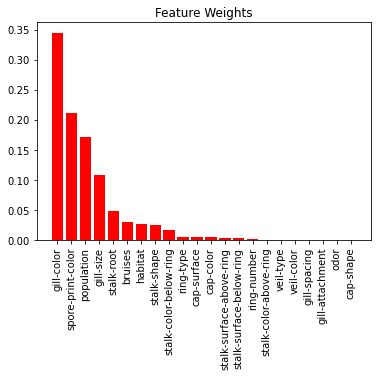

In [21]:
# 获取特征权重值
weights = tree_clf.feature_importances_
print('特征权重值\n', weights)

# 索引降序排列
sort_index = np.argsort(weights)[::-1] 
# 对应的特征名
name = [category_da[i] for i in sort_index]
print('\n特征名\n', name)

# 可视化
plt.bar(x=name, height=weights[sort_index], color='r')
_ = plt.xticks(rotation=90)
plt.title('Feature Weights')

In [22]:
df = pd.DataFrame({'train_model_score':train_model_score,'test_model_score':test_model_score},index=name_clf_list)
df

,train_model_score,test_model_score
逻辑回归,0.949531,0.953231
朴素贝叶斯,0.915833,0.926154
支持向量机,0.970149,0.977846
决策树,1.000000,1.000000


## 对模型参数进行调优

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# 1、逻辑回归参数
logist_params = {
    'C': np.logspace(0, 4, 10),  # C:float,默认为1.0.指定了正则化项系数的倒数。必须是⼀个正的浮点数。 C值越⼩,正则化项就越大
    'penalty': ['l1', 'l2']      # l1 l2 正则化函数   指定了正则化策略。默认为"l2"
}

# 2、朴素贝叶斯参数
NB_params = {
    'var_smoothing':[1e-8,1e-9]  # 所有要素的最大方差的部分，添加到计算稳定性的方差中,（默认值= 1e-9）
}

# 3、K近邻参数
KN_params = {
    'n_neighbors':range(2,10,1),  # K值
    'weights':['uniform','distance'],# 投票权重
    'algorithm':['ball_tree','kd_tree','brute','auto'], #  最近邻的算法
    'p' : [1,2]    # 曼哈顿距离，欧式距离
}

# 4、支持向量机参数
svc_params ={
    'kernel':['linear','rbf','sigmoid','poly'],# 核函数，默认是rbf，可以是‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
    'C':np.linspace(0.1,20,50) 
    }

# 5、决策树
tree_params={
    'criterion':['gini','entropy'], # 指定切分质量的评价标准 gini系数、熵
    'splitter':['best','random'], # 切分原则，最优切分，随机切分
    'min_samples_leaf':range(5,31,5) # 指定每个叶子结点包含的最少的样本数
}

In [25]:
logist_clf = LogisticRegression() # 逻辑回归
NB_clf = GaussianNB()             # 朴素贝叶斯
KN_clf = KNeighborsClassifier()   # K近邻
scv_clf = svm.SVC()               # 支持向量机
tree_clf = DecisionTreeClassifier() # 决策树

clf_list = [logist_clf,NB_clf,KN_clf,svc_clf,tree_clf]
params_list = [logist_params,NB_params,KN_params,svc_params,tree_params]

clf_CV_list = ['logist_clf_CV','NB_clf_CV','KN_clf_CV','svc_clf_CV','tree_clf_CV']

In [26]:
for i in range(len(clf_list)):
    clf_CV_list[i] = GridSearchCV(clf_list[i],params_list[i],cv=3)
    clf_CV_list[i].fit(x_train, y_train)

In [27]:
train_model_CV_score,test_model_CV_score=[],[]
for i in clf_CV_list:
    train_model_CV_score.append(metrics.accuracy_score(y_train,i.predict(x_train)))
    test_model_CV_score.append(metrics.accuracy_score(y_test,i.predict(x_test)))


In [31]:
train_model_CV_score = train_model_CV_score[:-1]
test_model_CV_score = test_model_CV_score[:-1]

# 现在所有列表的长度应该都是4
print(len(train_model_score))
print(len(test_model_score))
print(len(train_model_CV_score))
print(len(test_model_CV_score))

4
4
4
4


In [32]:
df = pd.DataFrame({'train_model_score':train_model_score
                   ,'test_model_score':test_model_score
                  ,'train_model_CV_score':train_model_CV_score
                  ,'test_model_CV_score':test_model_CV_score
                   }
                  ,index=name_clf_list)

In [33]:
df

,train_model_score,test_model_score,train_model_CV_score,test_model_CV_score
逻辑回归,0.949531,0.953231,0.955839,0.958769
朴素贝叶斯,0.915833,0.926154,0.915833,0.926154
支持向量机,0.970149,0.977846,1.000000,1.000000
决策树,1.000000,1.000000,1.000000,1.000000
